파이썬으로 구현하는 행렬


np.asarray([[matrix]]): 행렬을 구현

In [1]:
import numpy as np

a = np.asarray([
    [1, 0],
    [3, 5],
    [-3, 6]
]
)

print(a)

[[ 1  0]
 [ 3  5]
 [-3  6]]


In [2]:
c = np.asarray([
      [1, 11, 3],
      [4, 2, 6],
])

d = np.asarray([
      [1, 12, 1],
      [13, 2, 7]
])

e = c + d

print(e)

[[ 2 23  4]
 [17  4 13]]


In [3]:
a = np.asarray([
    [1, 11, 3],
    [4, 2, 6],
])

b = np.asarray([
    [1, 0],
    [3, 5],
    [-3, 6]
])

c = np.dot(a, b)

print(c.shape)

(2, 2)


In [4]:
a = np.asarray([
    [-1, 1, 5],
    [0, 2, 4]
])

b = a.T

print("이 matrix의 demension은 {} 입니다".format(b.shape))

이 matrix의 demension은 (3, 2) 입니다


**신경망이란?**


*   신경망은 뉴런처럼 뉴런이 다른 뉴런에 영항을 끼치는 것 과 같이 레이어가 다른 레이어에 영항을 미친다.
*   신경망은 input, layer, weight, output으로 구성되어 있다.

input: 말 그대로 layer에 들어가는 입력값, 보통 여러 개가 들어가기 때문에 matrix의 형태로 들어간다.

layer: input을 가지고 하나의 과정을 수행하는 것. 하나의 layer를 통과할 때 마다 과정이 진행됨.

weight: 가중치

output: 모든 layer를 통과하면 나오는 결과. 이를 목표값인 target과 비교해서 학습을 시킨다.

layer에서의 가중치 반영방식 및 output 산출방식

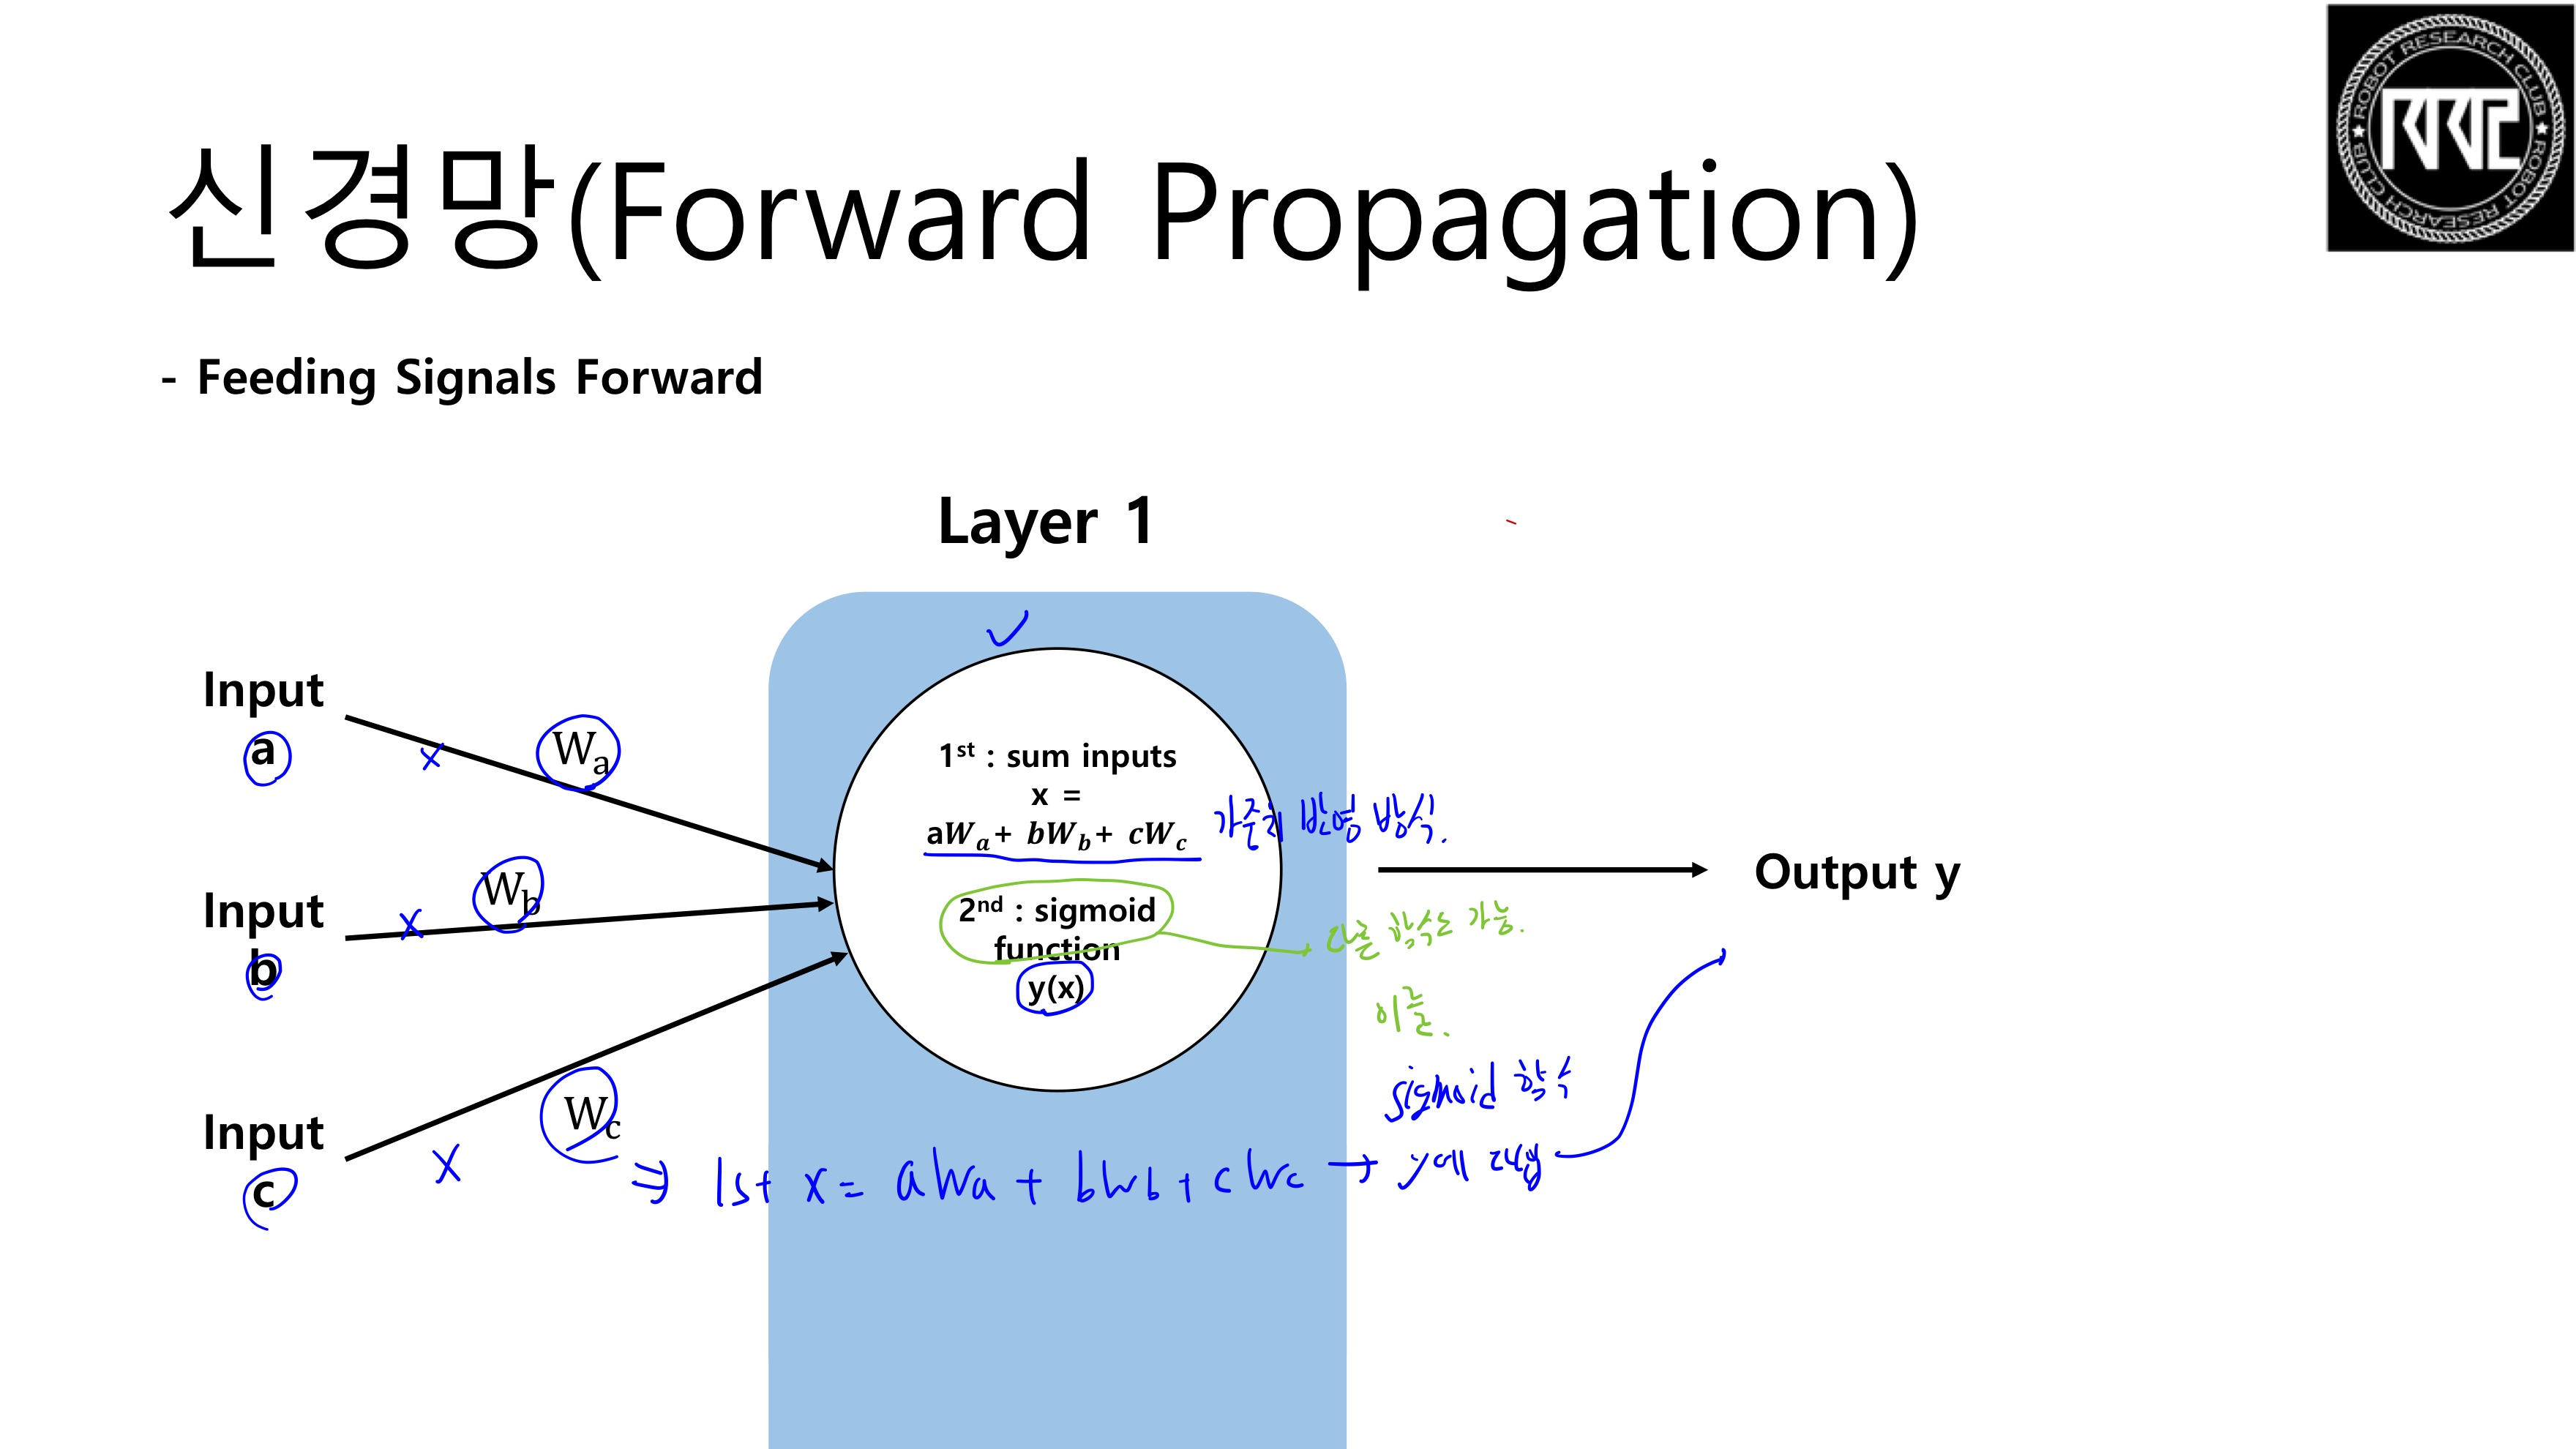






**가중치를 반영하여 어떻게 써먹을까?**


1.   먼저 가중치는 선형적으로 반영한다. (ax1+ax2+ax3=c) 즉, 행렬곱의 형태로 표현된다. 그래서 matirx로 input이 들어가는 것. (이게 layer1에서 먼저 가중치를 반영하는 과정)
2.   가중치를 반영하면 이를 sigmoid function의 layer에 대입하여 ouput을 뽑아낸다.
3.   output과 target을 비교한다
4.   오차를 구해서 이를 기울기를 통해 weight에 반영한다.







In [5]:
import numpy as np
I = np.asarray([[0.9, 0.1, 0.8]]).T #input matrix
W_input_hidden = np.asarray(
    [[0.9, 0.3, 0.4],
    [0.2, 0.8, 0.2],
    [0.1, 0.5, 0.6]]
)                             #가중치 matrix layer1을 수행할 때 쓰이는 matrix

print(I.shape)
print(I)
print('-----')
print(W_input_hidden.shape)
print(W_input_hidden)

(3, 1)
[[0.9]
 [0.1]
 [0.8]]
-----
(3, 3)
[[0.9 0.3 0.4]
 [0.2 0.8 0.2]
 [0.1 0.5 0.6]]


In [6]:
import numpy as np
target = np.asarray([[0.6, 0.8, 0.5]]).T #target값의 matrix
W_hidden_output = np.asarray(
    [[0.3, 0.7, 0.5],
    [0.6, 0.5, 0.2],
    [0.8, 0.1, 0.9]]
)                               #첫 번째 output에 대한 weight matrix

print(target.shape)
print(target)
print('-----')
print(W_input_hidden.shape)
print(W_input_hidden)

(3, 1)
[[0.6]
 [0.8]
 [0.5]]
-----
(3, 3)
[[0.9 0.3 0.4]
 [0.2 0.8 0.2]
 [0.1 0.5 0.6]]


In [7]:
X_hidden = np.dot(W_input_hidden, I) #input에 가중치를 반영해 저장한다
print(X_hidden.shape)
print(X_hidden) #가중치를 반영한 matrix 출력

(3, 1)
[[1.16]
 [0.42]
 [0.62]]


In [8]:
import scipy.special
sigmoid_function = lambda x: scipy.special.expit(x) #scipy library를 이용하여 sigmoid function을 만든다. output은 만들어야하니까

O_hidden = sigmoid_function(X_hidden) #첫 output은 input에 가중치를 반영한 matrix를 sigmoidfuction에 대입하여 만든다.
print(O_hidden.shape)
print(O_hidden) #출력하여 결과 확인

(3, 1)
[[0.76133271]
 [0.60348325]
 [0.65021855]]


In [9]:
X_output = np.dot(W_hidden_output, O_hidden) #첫 ouput에 가중치를 반영하자
print(X_output.shape)
print(X_output)

(3, 1)
[[0.97594736]
 [0.88858496]
 [1.25461119]]


In [10]:
O_output = sigmoid_function(X_output) #가중치를 반영한 값을 sigmoid function에 대입해서 출력을 만들자
print(O_output.shape)
print(O_output)

(3, 1)
[[0.72630335]
 [0.70859807]
 [0.77809706]]


**타겟값과 output을 비교하면 오차가 꽤 크다는 것을 알 수 있다.**

우리는 이 오차를 줄이기 위해 가중치를 조절해야만 함.

결론은 output을 가지고  weight를 수정해야만 한다.

그 때 사용하는 방법이 gradient descent 방식이다.

이 일련의 과정을 backward propagatoin이라고 한다.

# 그렇다면 오차를 어떻게 반영할까?


In [11]:
output_error = target - O_output
hidden_error = np.dot(W_hidden_output.T, output_error)

W_hidden_output = W_hidden_output - (-0.1*np.dot(output_error*O_output*(1-O_output), O_hidden.T))
W_input_hidden = W_input_hidden - (-0.1*np.dot(hidden_error*O_hidden*(1-O_hidden), I.T))

print(W_input_hidden.shape)
print(W_input_hidden)
print('-------')
print(W_hidden_output.shape)
print(W_hidden_output)

(3, 3)
[[0.89663891 0.29962655 0.39701237]
 [0.19848124 0.79983125 0.19864999]
 [0.09395837 0.49932871 0.59462966]]
-------
(3, 3)
[[0.29808849 0.69848481 0.49836747]
 [0.60143689 0.50113897 0.20122718]
 [0.79634432 0.09710227 0.89687786]]


In [12]:
n_of_epochs = 1000

for epoch in range(n_of_epochs):
  #forward pass
  X_hidden = np.dot(W_input_hidden, I)
  O_hidden = sigmoid_function(X_hidden)
  X_output = np.dot(W_hidden_output, O_hidden)
  O_output = sigmoid_function(X_output)

  #Backward pass
  output_error = target - O_output
  hidden_error = np.dot(W_hidden_output.T, output_error)
  W_hidden_output = W_hidden_output - (-0.1*np.dot(output_error*O_output*(1-O_output), O_hidden.T))
  W_input_hidden = W_input_hidden - (-0.1*np.dot(hidden_error*O_hidden*(1-O_hidden), I.T))

  if epoch % 100 == 0:
    print('Epoch: ', epoch)
    total_error = np.sum(output_error ** 2)
    print('Error: {:.10f}'.format(total_error))
    print('Current Output: \n', O_output)

print('---------Training Finished--------')

Epoch:  0
Error: 0.1004317322
Current Output: 
 [[0.7252582 ]
 [0.70885359]
 [0.7764678 ]]
Epoch:  100
Error: 0.0283805787
Current Output: 
 [[0.65917641]
 [0.73210189]
 [0.64236775]]
Epoch:  200
Error: 0.0080824028
Current Output: 
 [[0.63287988]
 [0.75402788]
 [0.56991338]]
Epoch:  300
Error: 0.0023537633
Current Output: 
 [[0.6191746 ]
 [0.77038939]
 [0.5333063 ]]
Epoch:  400
Error: 0.0007180357
Current Output: 
 [[0.61117116]
 [0.78118309]
 [0.51546496]]
Epoch:  500
Error: 0.0002342221
Current Output: 
 [[0.60646645]
 [0.78805803]
 [0.50705666]]
Epoch:  600
Error: 0.0000817101
Current Output: 
 [[0.60373853]
 [0.79241139]
 [0.50318536]]
Epoch:  700
Error: 0.0000300649
Current Output: 
 [[0.60217094]
 [0.79517209]
 [0.50142939]]
Epoch:  800
Error: 0.0000114710
Current Output: 
 [[0.6012711 ]
 [0.79692663]
 [0.50064004]]
Epoch:  900
Error: 0.0000044764
Current Output: 
 [[0.60075191]
 [0.79804329]
 [0.50028688]]
---------Training Finished--------


In [13]:
#forward pass
X_hidden = np.dot(W_input_hidden, I)
O_hidden = sigmoid_function(X_hidden)
X_output = np.dot(W_hidden_output, O_hidden)
O_output = sigmoid_function(X_output)

print('Output After Training: \n', O_output)
print('\n Target: ', target, '\n')

Output After Training: 
 [[0.60044962]
 [0.79875442]
 [0.5001291 ]]

 Target:  [[0.6]
 [0.8]
 [0.5]] 

